In [ ]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D 

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [ ]:
edges = [['A','B'],['A','C'],['A','D'] ,['B','C'],['B','D'], ['B','E'], ['C', 'E'], ['D', 'E'], ['C', 'F'], ['E', 'F']]
nachbar = {'A':'DBC', 'B': 'ACDE', 'C':'ABEF', 'D':'ABE', 'E':'DBCF' , 'F': 'EC'}
edge_labels={('A','B'):1,('A','C'):6,('A','D'):3 ,('B','C'):1,('B','D'):4, ('B','E'):5, ('C', 'E'):3, ('D', 'E'):5, ('C', 'F'):4, ('E', 'F'):2}

G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)


In [ ]:
distances = {'AB': 1, 'BA': 1, 'AD':3, 'DA':3, 'AC':6, 'CA':6, 'BC':1, 'CB': 1, 'BD':4, 'DB':4,
             'BE':5, 'EB':5, 'CE':3, 'EC':3, 'CF':4, 'FC':4, 'DE':5, 'ED':5, 'EF': 2, 'FE':2 }
distances= pd.Series(distances, index = distances.keys())
distances

AB    1
BA    1
AD    3
DA    3
AC    6
CA    6
BC    1
CB    1
BD    4
DB    4
BE    5
EB    5
CE    3
EC    3
CF    4
FC    4
DE    5
ED    5
EF    2
FE    2
dtype: int64

Смотрим соседей вершины A
Синим подсвечены рассматриваемые соседи


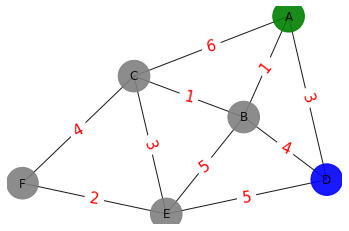

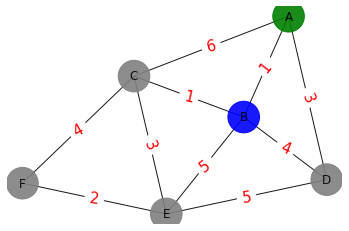

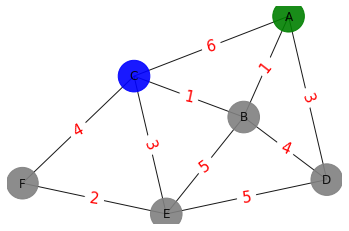

Список текущих расстояний:  {'D': 3, 'B': 1, 'C': 6}
------ищем ту вершину, у которой текущий наименьший вес------
Наименьший вес у вершины B ee расстояние 1
Теперь зеленая вершина  B
Красные вершины - те, для которых были рассмотрены соседи


Смотрим соседей вершины B
Синим подсвечены рассматриваемые соседи


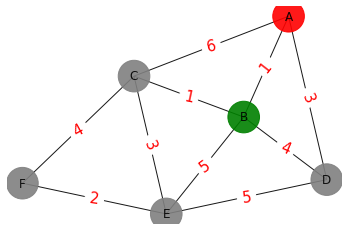

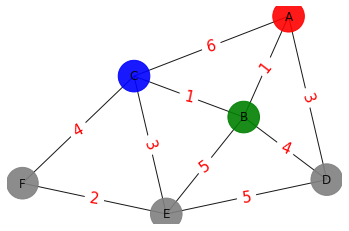

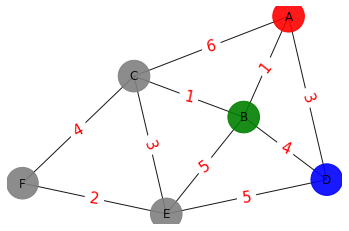

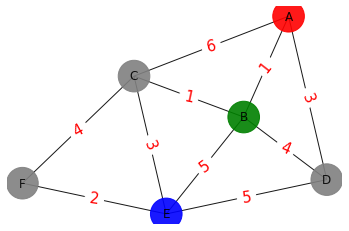

Список текущих расстояний:  {'D': 3, 'C': 2, 'E': 6}
------ищем ту вершину, у которой текущий наименьший вес------
Наименьший вес у вершины C ee расстояние 2
Теперь зеленая вершина  C
Красные вершины - те, для которых были рассмотрены соседи


Смотрим соседей вершины C
Синим подсвечены рассматриваемые соседи


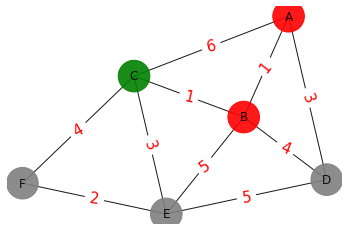

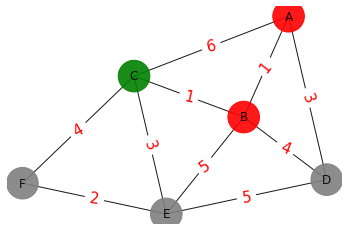

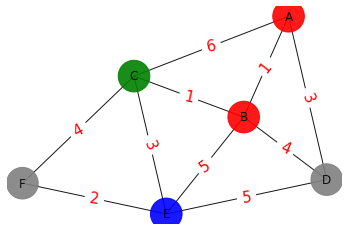

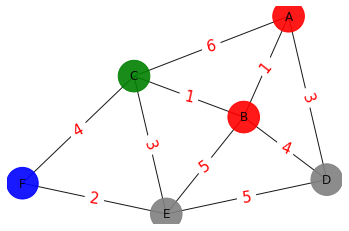

Список текущих расстояний:  {'D': 3, 'E': 5, 'F': 6}
------ищем ту вершину, у которой текущий наименьший вес------
Наименьший вес у вершины D ee расстояние 3
Теперь зеленая вершина  D
Красные вершины - те, для которых были рассмотрены соседи


Смотрим соседей вершины D
Синим подсвечены рассматриваемые соседи


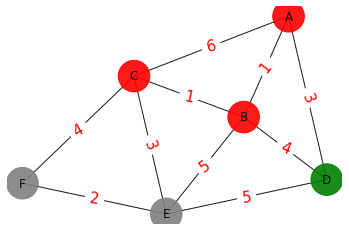

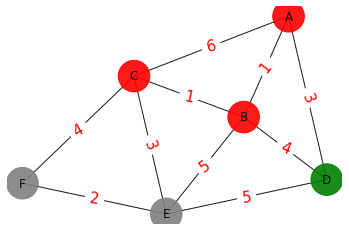

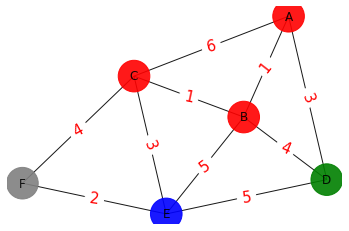

Список текущих расстояний:  {'E': 5, 'F': 6}
------ищем ту вершину, у которой текущий наименьший вес------
Наименьший вес у вершины E ee расстояние 5
Теперь зеленая вершина  E
Красные вершины - те, для которых были рассмотрены соседи


Смотрим соседей вершины E
Синим подсвечены рассматриваемые соседи


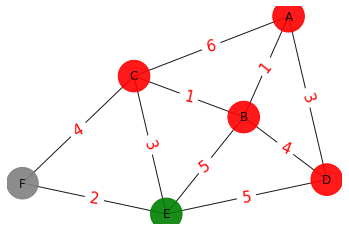

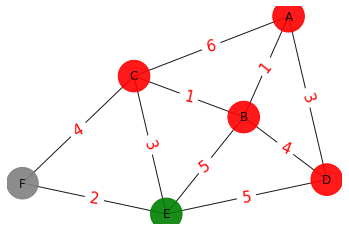

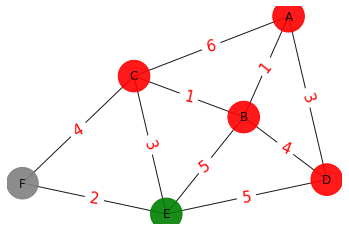

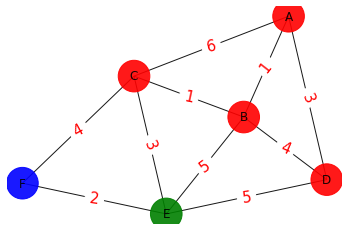

Список текущих расстояний:  {'F': 6}
------ищем ту вершину, у которой текущий наименьший вес------
Наименьший вес у вершины F ee расстояние 6
Теперь зеленая вершина  F
Красные вершины - те, для которых были рассмотрены соседи


Смотрим соседей вершины F
Синим подсвечены рассматриваемые соседи


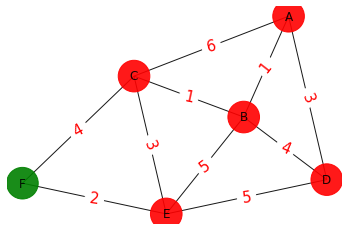

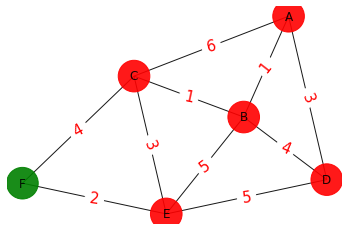

In [ ]:
used = []
graph = pd.DataFrame(pd.Series(nachbar, index = nachbar.keys()))
graph['distance'] = [1000 for i in range(6)]
graph = graph.rename({0: 'nachbarn'}, axis = 1)
graph.iloc[0,1] = 0
qu = {'A':0}
vertex, weight = 'A', 0

while True:
  print('Смотрим соседей вершины ' + vertex)
  print('Синим подсвечены рассматриваемые соседи')
  for nach in graph.nachbarn.loc[vertex]:
    
    if nach not in used:
        if graph.loc[nach, 'distance'] == 1000:
          graph.loc[nach, 'distance'] = weight + distances.loc[vertex+nach]
          qu[nach] = weight + distances.loc[vertex+nach]
        elif graph.loc[nach, 'distance'] >= weight + distances.loc[vertex+nach]:
          print()
          graph.loc[nach, 'distance'] = weight + distances.loc[vertex+nach]
          qu[nach] = graph.loc[nach, 'distance'] 
    else:
      pass

    color_map = []
    for node in G:
      if node in used:
        color_map.append('r')
      else:
        if node == nach:
          color_map.append('blue')  
        elif node == vertex:
          color_map.append('green')
        else:
           color_map.append('grey')

    nx.draw_networkx_edge_labels(G,pos,edge_labels,font_color='red', font_size = 15)
    nx.draw(G,pos,edge_color='black' ,width=1,linewidths=1, node_size=1000, node_color=color_map ,alpha=0.9, labels={node:node for node in G.nodes()})
    plt.show()
  used.append(vertex)
  del qu[used[-1]]
  if len(qu) == 0:
    break
  print('Список текущих расстояний: ', qu)
  print('------ищем ту вершину, у которой текущий наименьший вес------')
  mini = min(sorted(qu.values()))
  inv_map = {v: k for k, v in qu.items()}
  vertex = inv_map[mini]
  weight = graph.loc[vertex, 'distance']
  #print(vertex, weight)
  print('Наименьший вес у вершины', vertex, 'ee расстояние', weight, sep=' ')
  print('Теперь зеленая вершина ', vertex)
  print('Красные вершины - те, для которых были рассмотрены соседи')
  print('\n')

In [ ]:
graph

,nachbarn,distance
A,DBC,0
B,ACDE,1
C,ABEF,2
D,ABE,3
E,DBCF,5
F,EC,6
